# Classification

### Getting the data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70000, 784)
y shape: (70000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

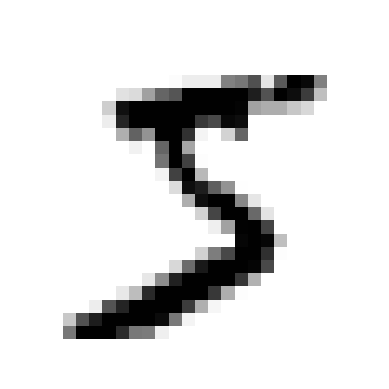

In [31]:
some_digit = mnist["data"].iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

In [33]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
X-train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]